**Name** - Vasu Bansal

**Roll No.** - 045055

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the dataset
url = "bank defaulter dataset.csv"  # Replace with the actual URL or path to your dataset
df = pd.read_csv(url)

# Basic information about the dataset

In [2]:
print("Basic Info about the Dataset:")
print(df.info())

Basic Info about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  

In [3]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [5]:
df.shape

(67463, 35)

# Plotting Non-Categorical Variabales

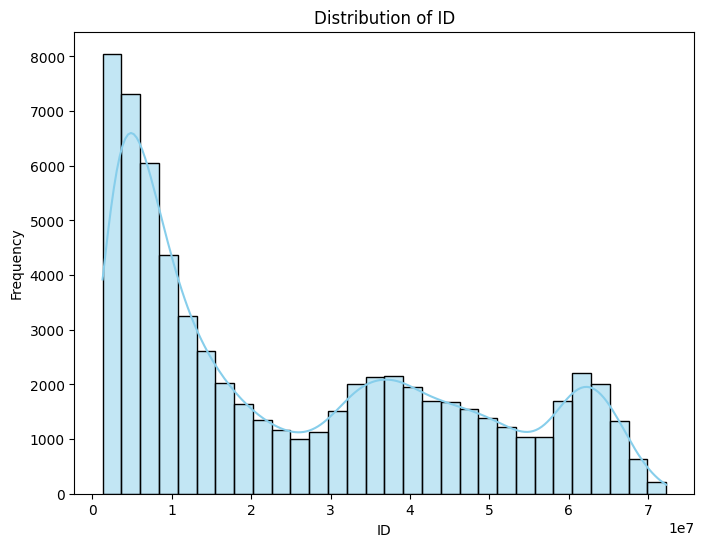

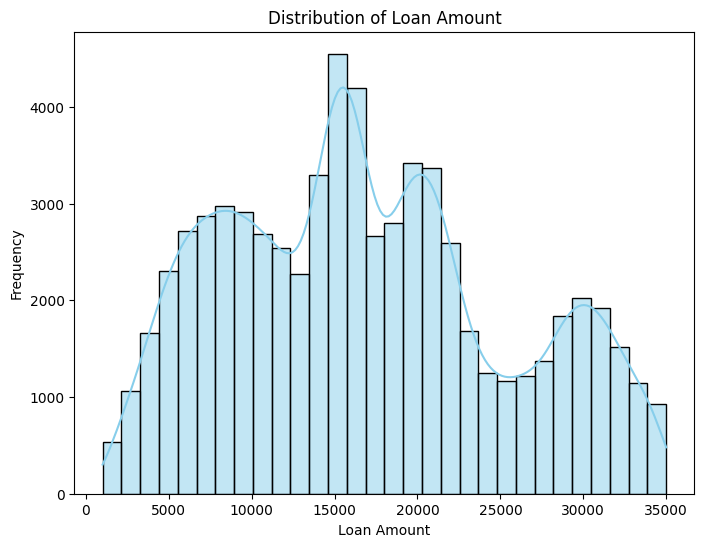

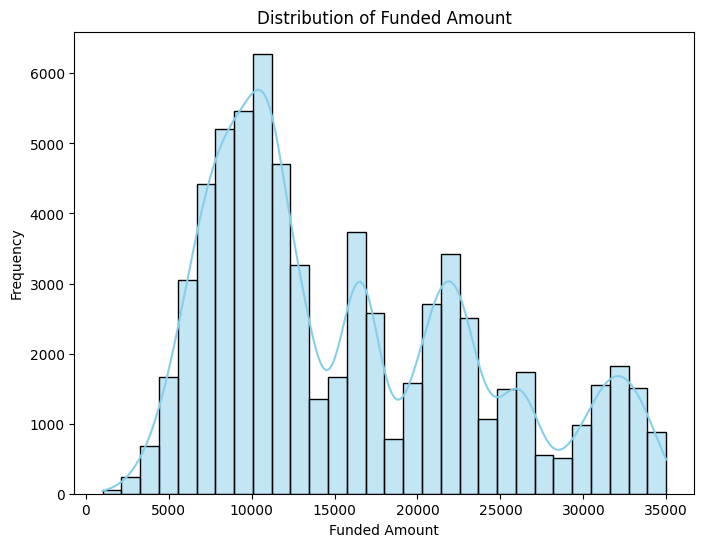

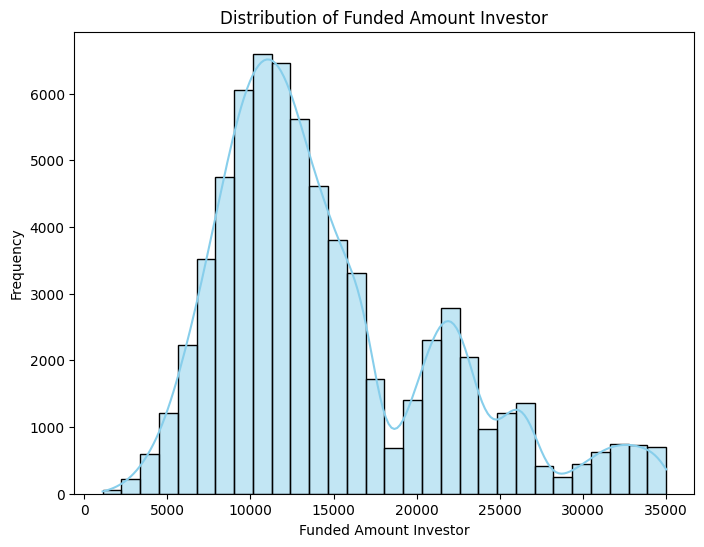

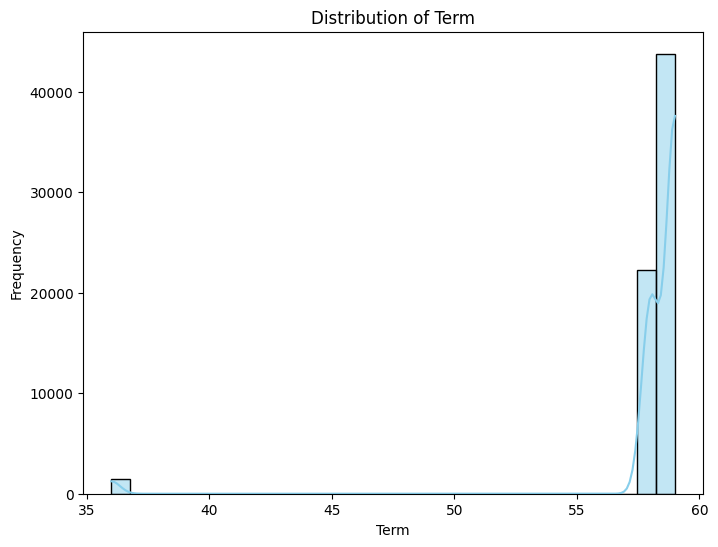

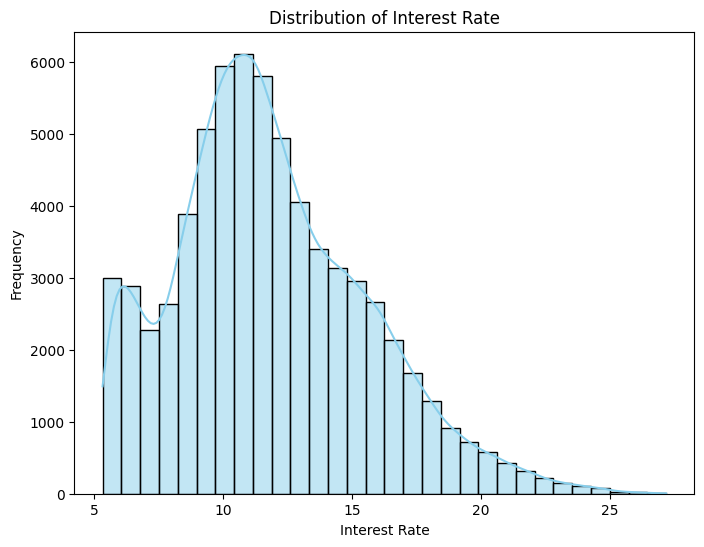

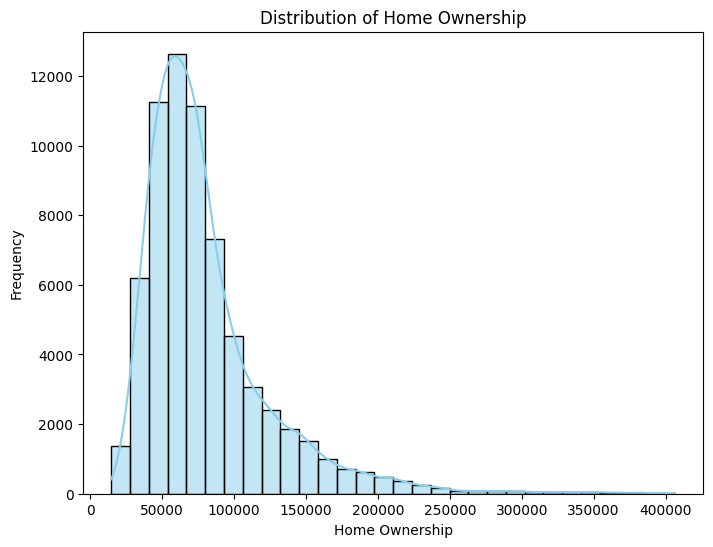

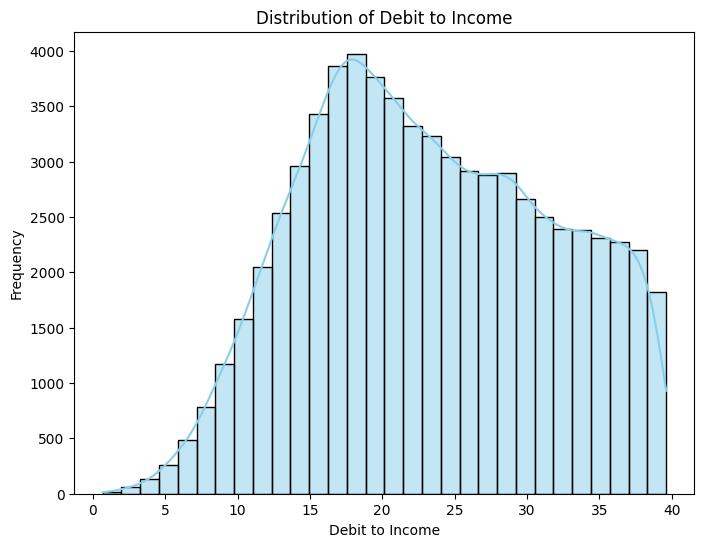

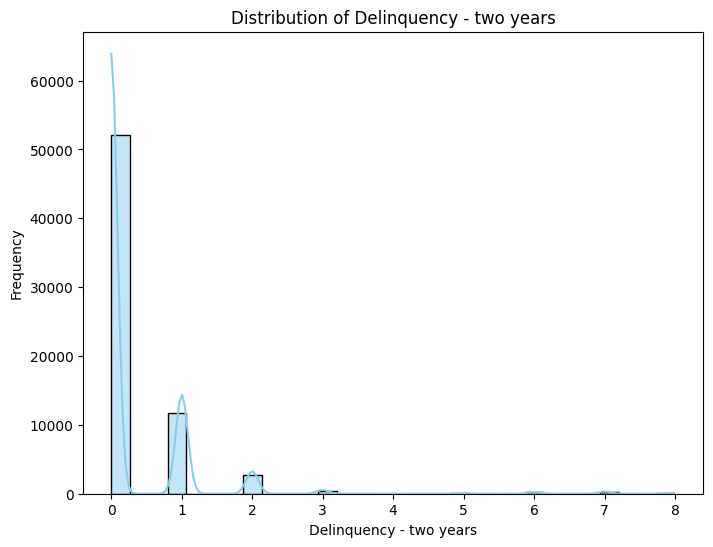

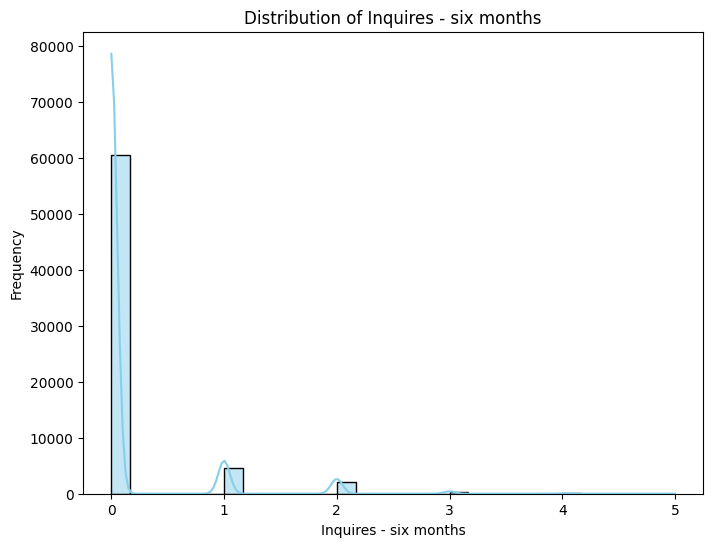

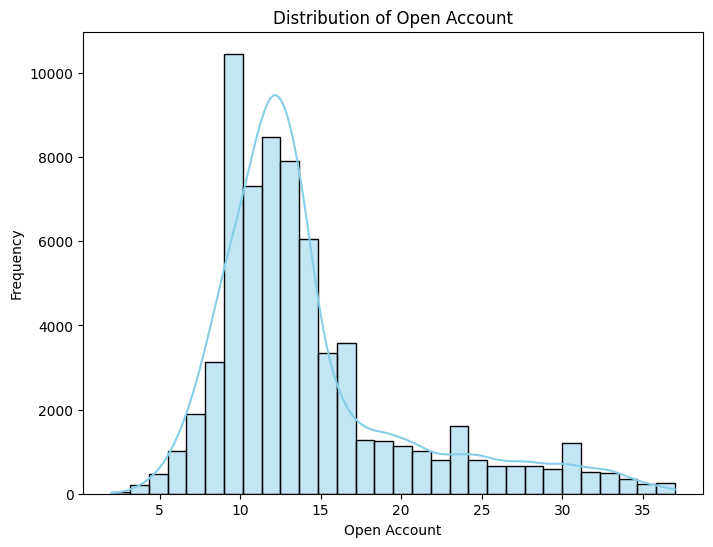

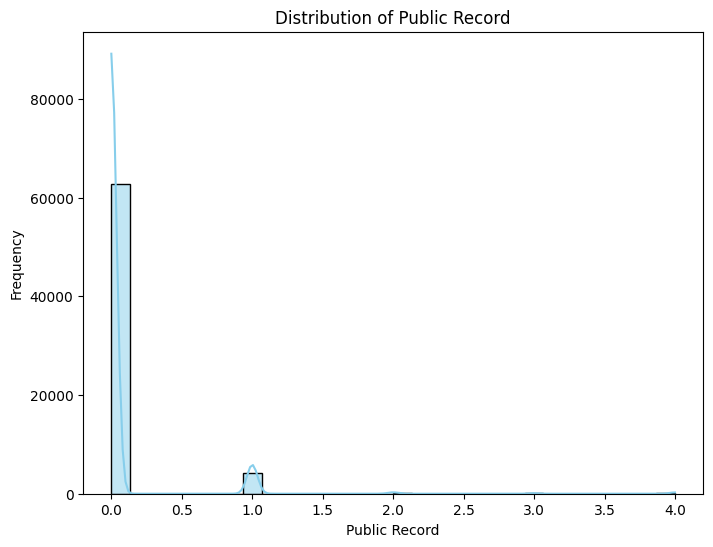

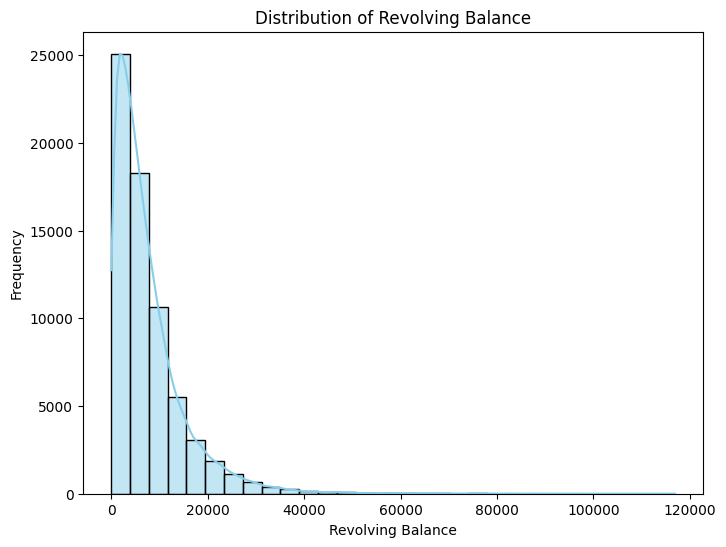

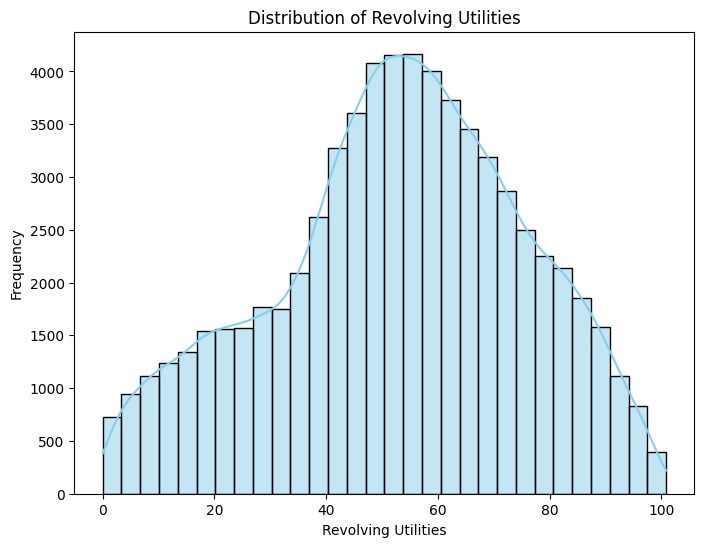

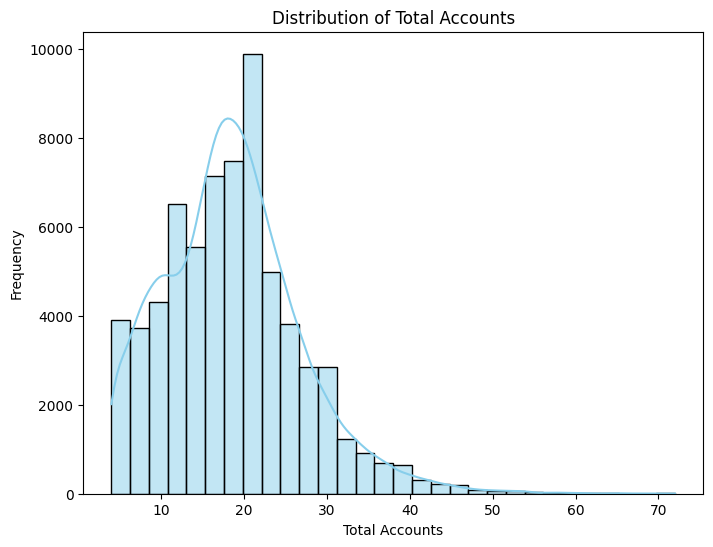

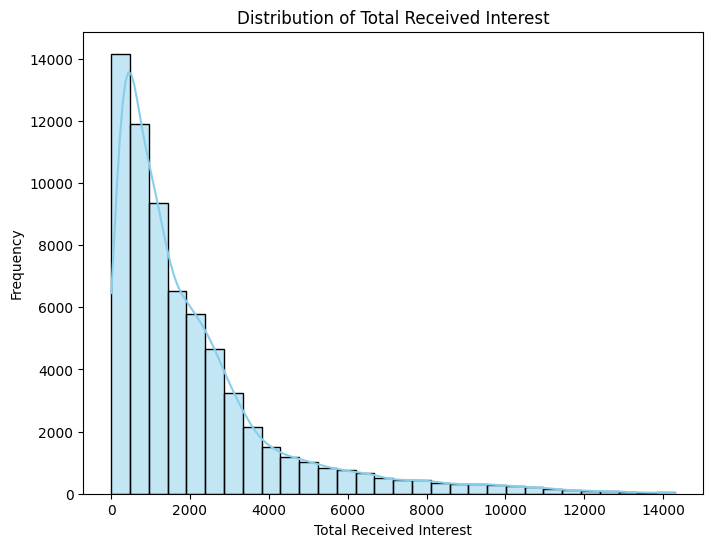

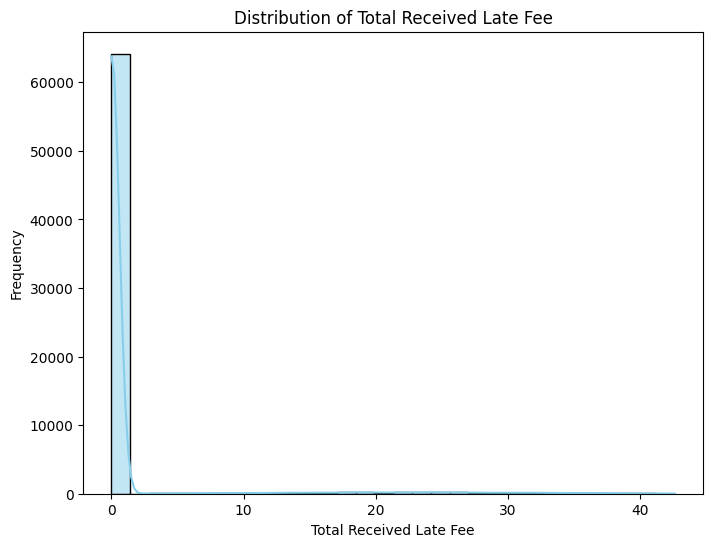

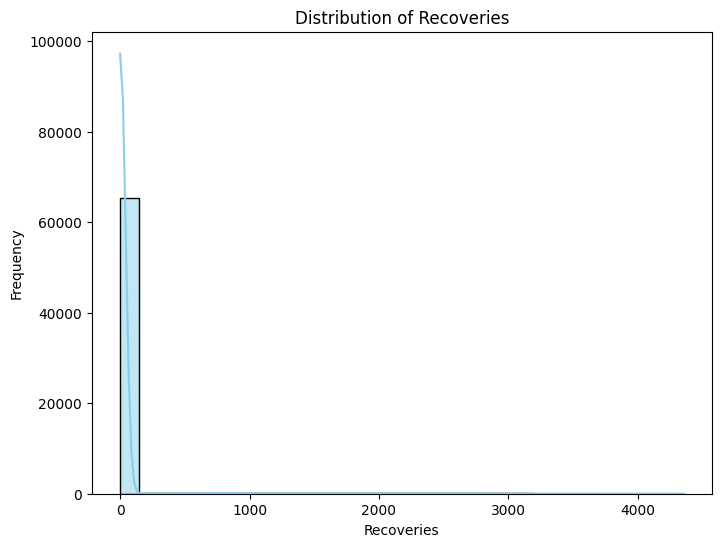

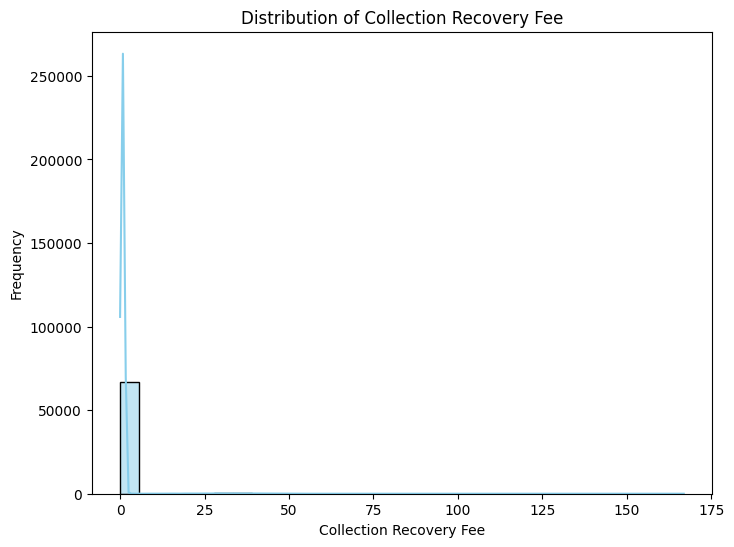

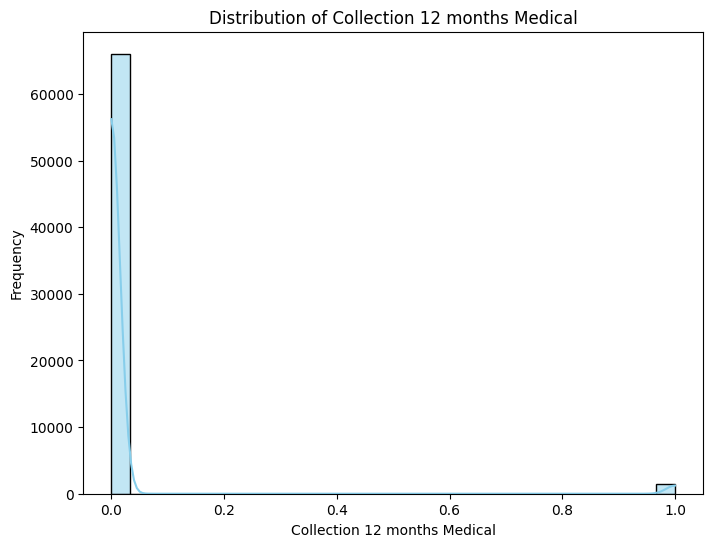

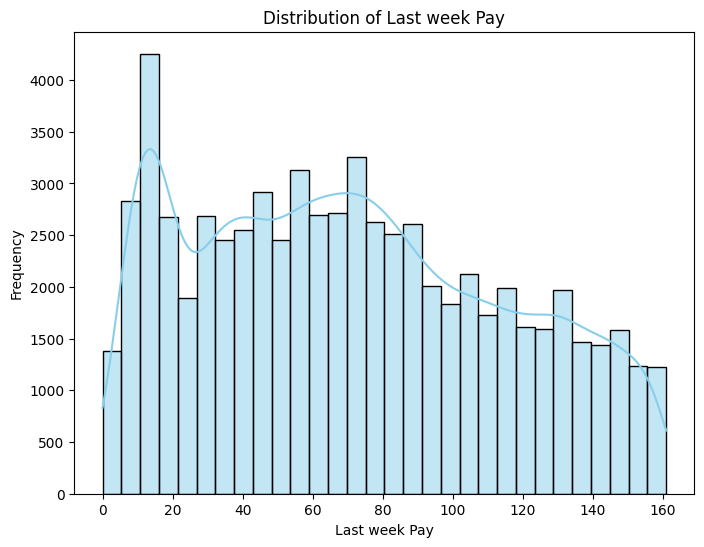

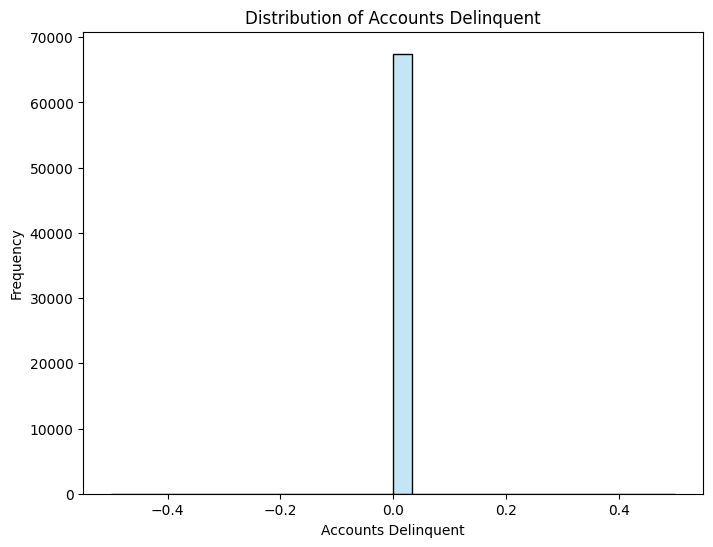

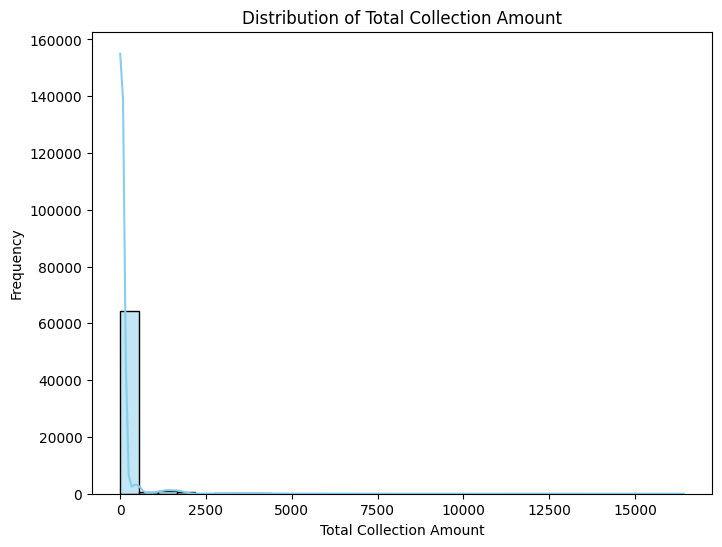

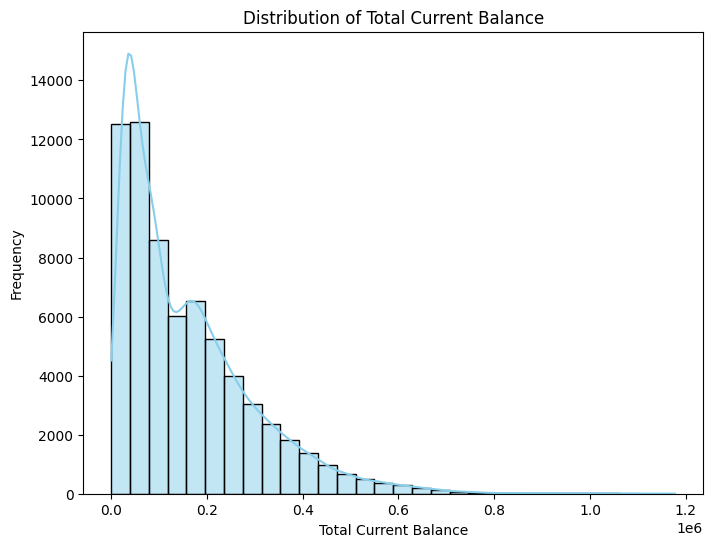

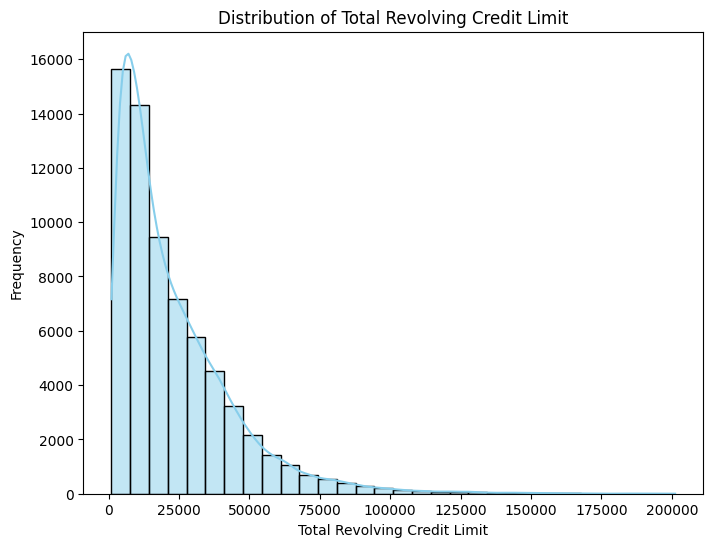

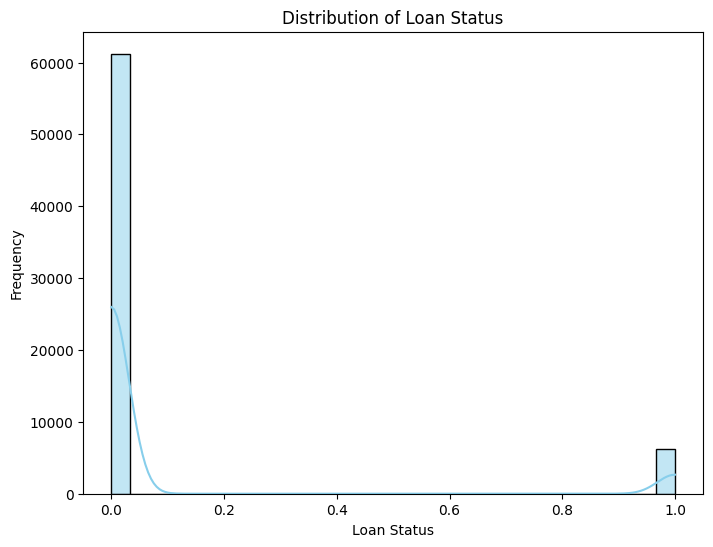

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract non-categorical columns
non_categorical_cols = df.select_dtypes(exclude=['object']).columns

# Plot histograms for each non-categorical variable
for col in non_categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

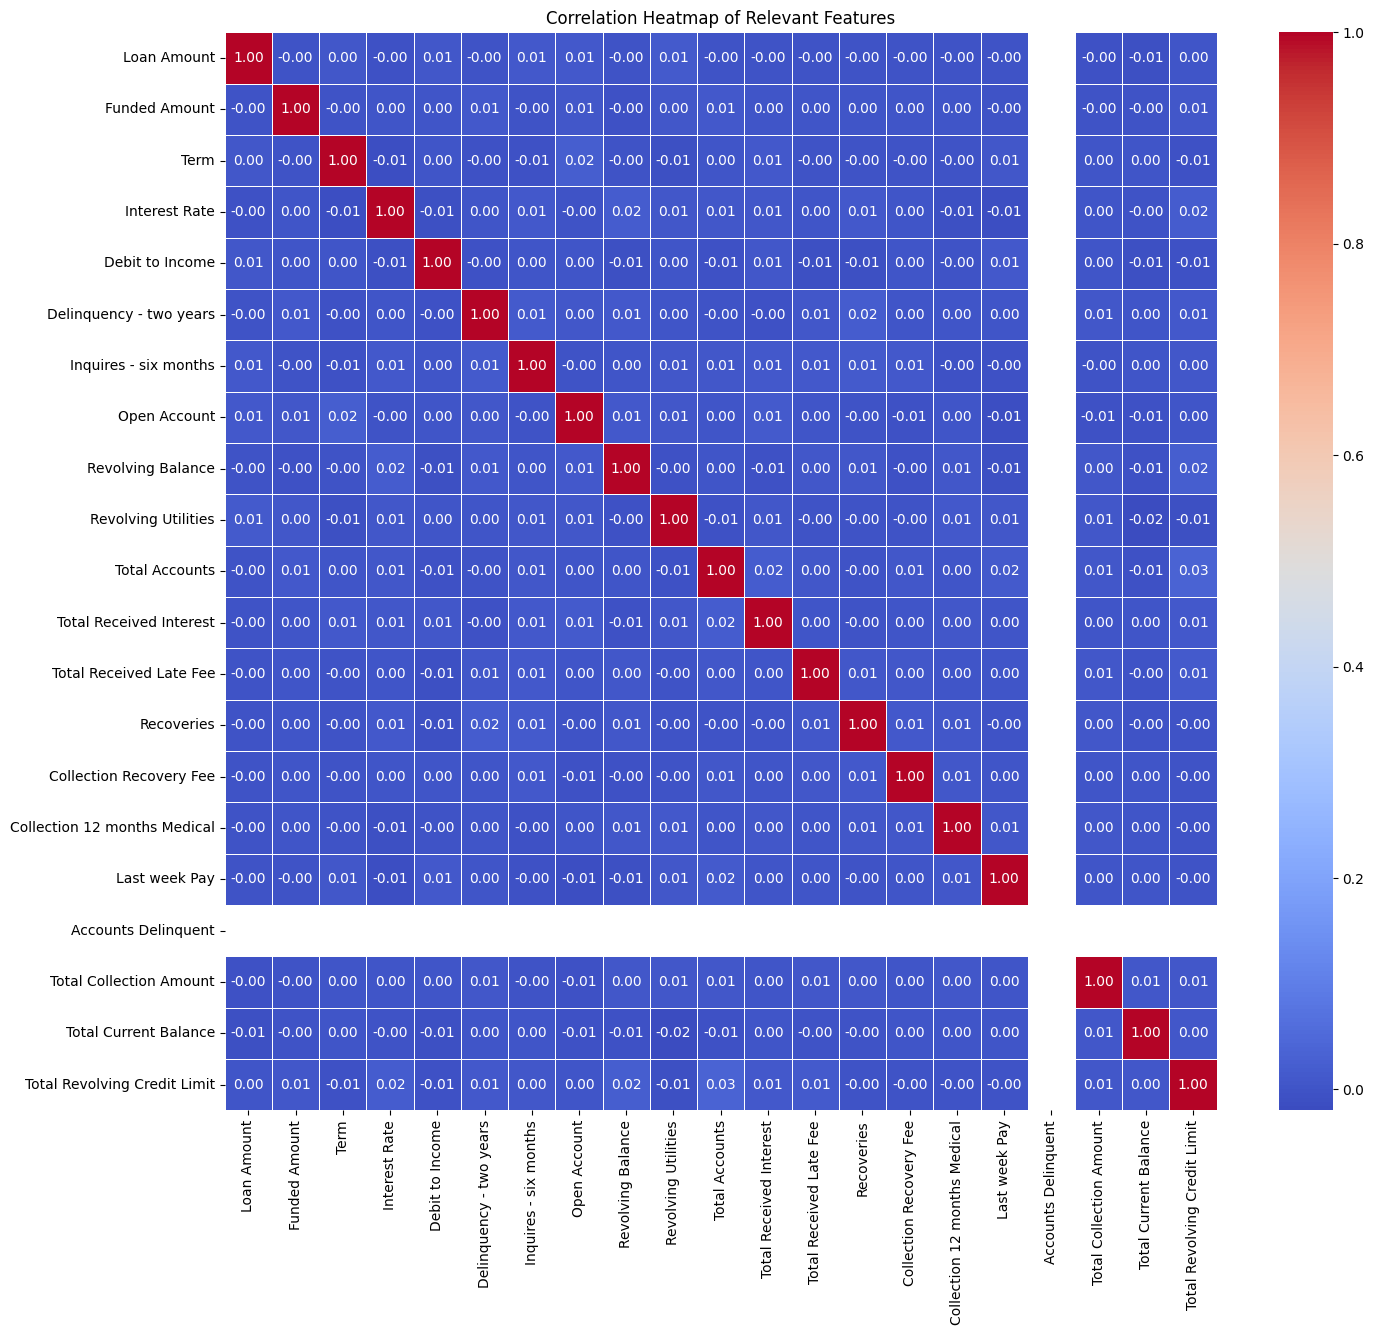

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for clustering
relevant_features = df[['Loan Amount', 'Funded Amount', 'Term', 'Interest Rate', 'Debit to Income',
                         'Delinquency - two years', 'Inquires - six months', 'Open Account',
                         'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
                         'Total Received Interest', 'Total Received Late Fee', 'Recoveries',
                         'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay',
                         'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance',
                         'Total Revolving Credit Limit']]

# Calculate the correlation matrix
correlation_matrix = relevant_features.corr()

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Relevant Features')
plt.show()

In [8]:
# Handling missing values
df.dropna(inplace=True)  # Assuming dropping missing values is appropriate for your case

# Handling duplicate values
df.drop_duplicates(inplace=True)

# Selecting 20% random data for clustering
df_sample = df.sample(frac=0.2, random_state=42)

# Extracting relevant features for clustering
features = df_sample.drop(['ID', 'Loan Status'], axis=1)

# Separate categorical and numerical columns
categorical_cols = features.select_dtypes(include=['object']).columns
numerical_cols = features.select_dtypes(exclude=['object']).columns

# Create a preprocessor to handle categorical and numerical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline for preprocessing and clustering for K-Means
kmeans_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])

# Fit and predict using the K-Means pipeline
df_sample['KMeans_Cluster'] = kmeans_pipeline.fit_predict(features)

# Continue with DBSCAN and Agglomerative Hierarchical Clustering

# Convert categorical columns to dummy variables for DBSCAN and Agglomerative Clustering
features_encoded = pd.get_dummies(features, columns=categorical_cols)

# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
df_sample['DBSCAN_Cluster'] = dbscan.fit_predict(features_encoded)

# Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
df_sample['Agg_Cluster'] = agg_clustering.fit_predict(features_encoded)

# Compare clustering algorithms using silhouette score
kmeans_silhouette = silhouette_score(features_encoded, df_sample['KMeans_Cluster'])
dbscan_labels = df_sample['DBSCAN_Cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Unique Grades Assigned by the Bank:
['B' 'C' 'F' 'A' 'G' 'E' 'D']


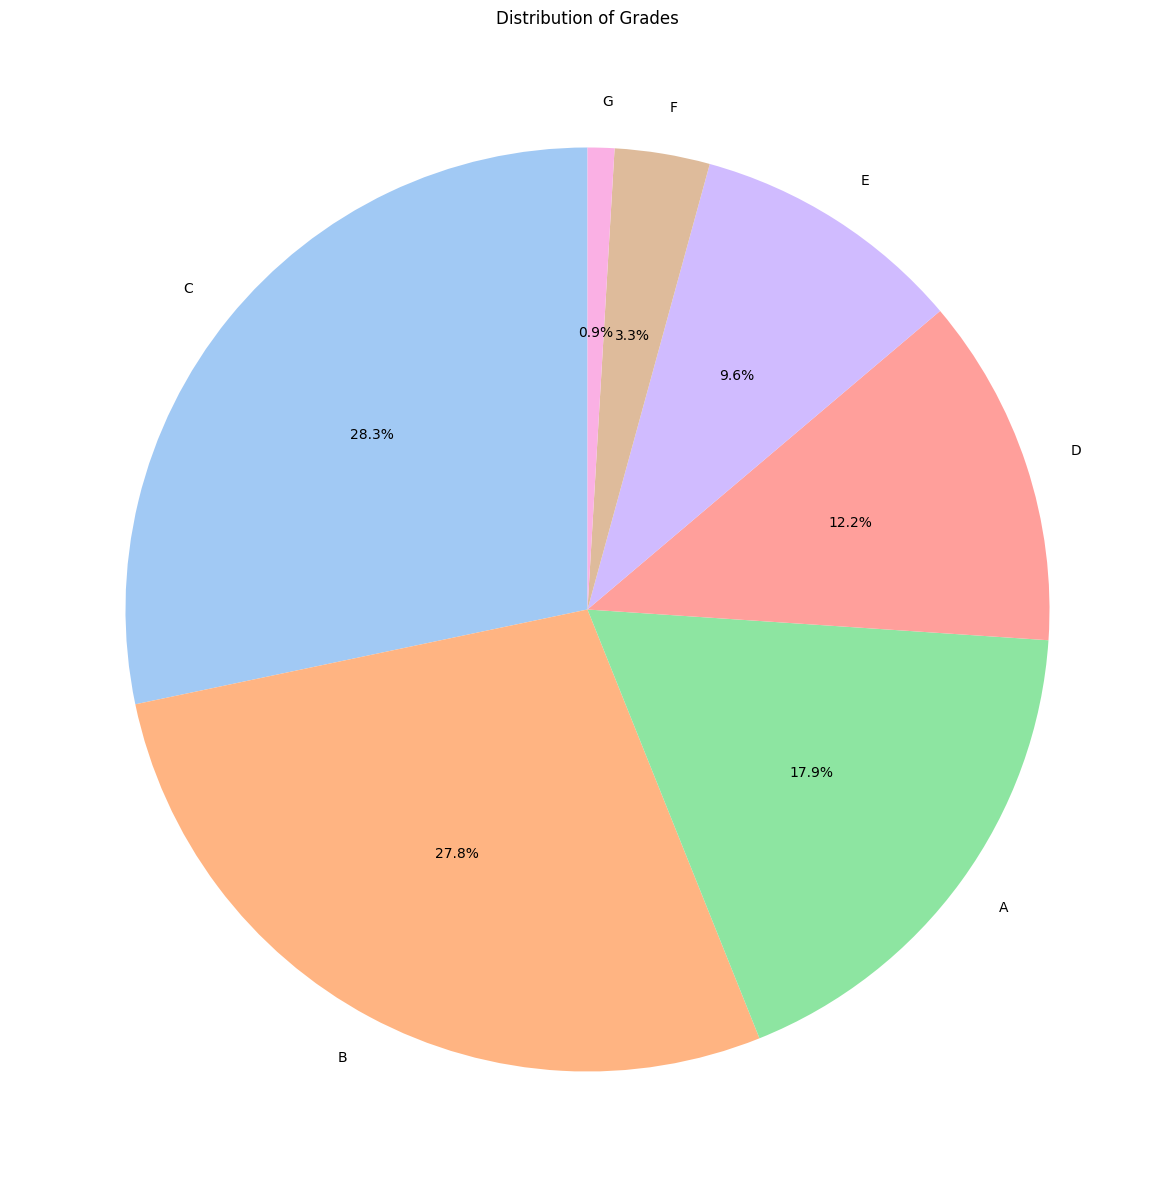

In [9]:
import matplotlib.pyplot as plt

# Extract unique grades
unique_grades = df['Grade'].unique()

# Display unique grades
print("Unique Grades Assigned by the Bank:")
print(unique_grades)

# Plot a pie chart for the distribution of grades
plt.figure(figsize=(15, 15))
plt.pie(df['Grade'].value_counts(), labels=df['Grade'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Grades')
plt.show()

In [10]:
# Filter out noisy points (-1) from DBSCAN labels
dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]
if len(np.unique(dbscan_labels_filtered)) > 1:
    dbscan_silhouette = silhouette_score(features_encoded, dbscan_labels_filtered)
    print(f"DBSCAN: {dbscan_silhouette}")
else:
    print("DBSCAN: Not enough distinct clusters for silhouette score")

agg_silhouette = silhouette_score(features_encoded, df_sample['Agg_Cluster'])

print("\nSilhouette Scores:")
print(f"K-Means: {kmeans_silhouette}")
print(f"Agglomerative: {agg_silhouette}")

DBSCAN: Not enough distinct clusters for silhouette score

Silhouette Scores:
K-Means: 0.009090858160099151
Agglomerative: 0.5798338074282351


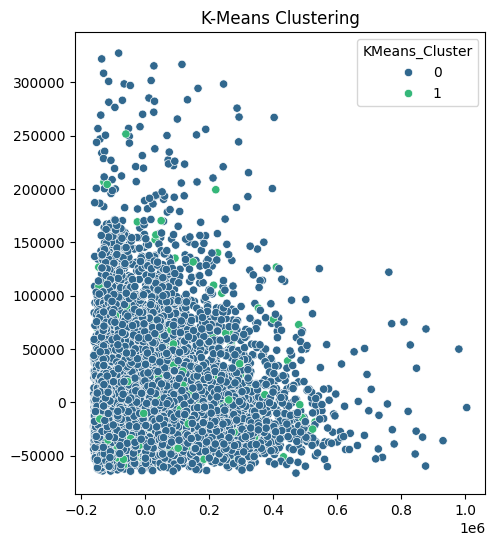

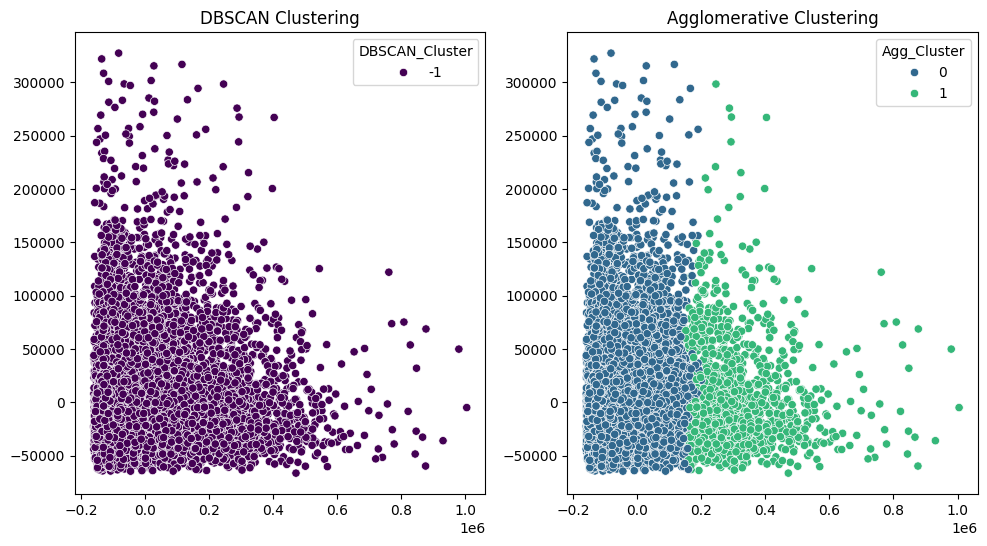

In [11]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_encoded)

plt.figure(figsize=(18, 6))

# K-Means
plt.subplot(1, 3, 1)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=df_sample['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.figure(figsize=(18, 6))

# DBSCAN
plt.subplot(1, 3, 2)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=df_sample['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')

# Agglomerative Hierarchical
plt.subplot(1, 3, 3)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=df_sample['Agg_Cluster'], palette='viridis')
plt.title('Agglomerative Clustering')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.8634051782605583


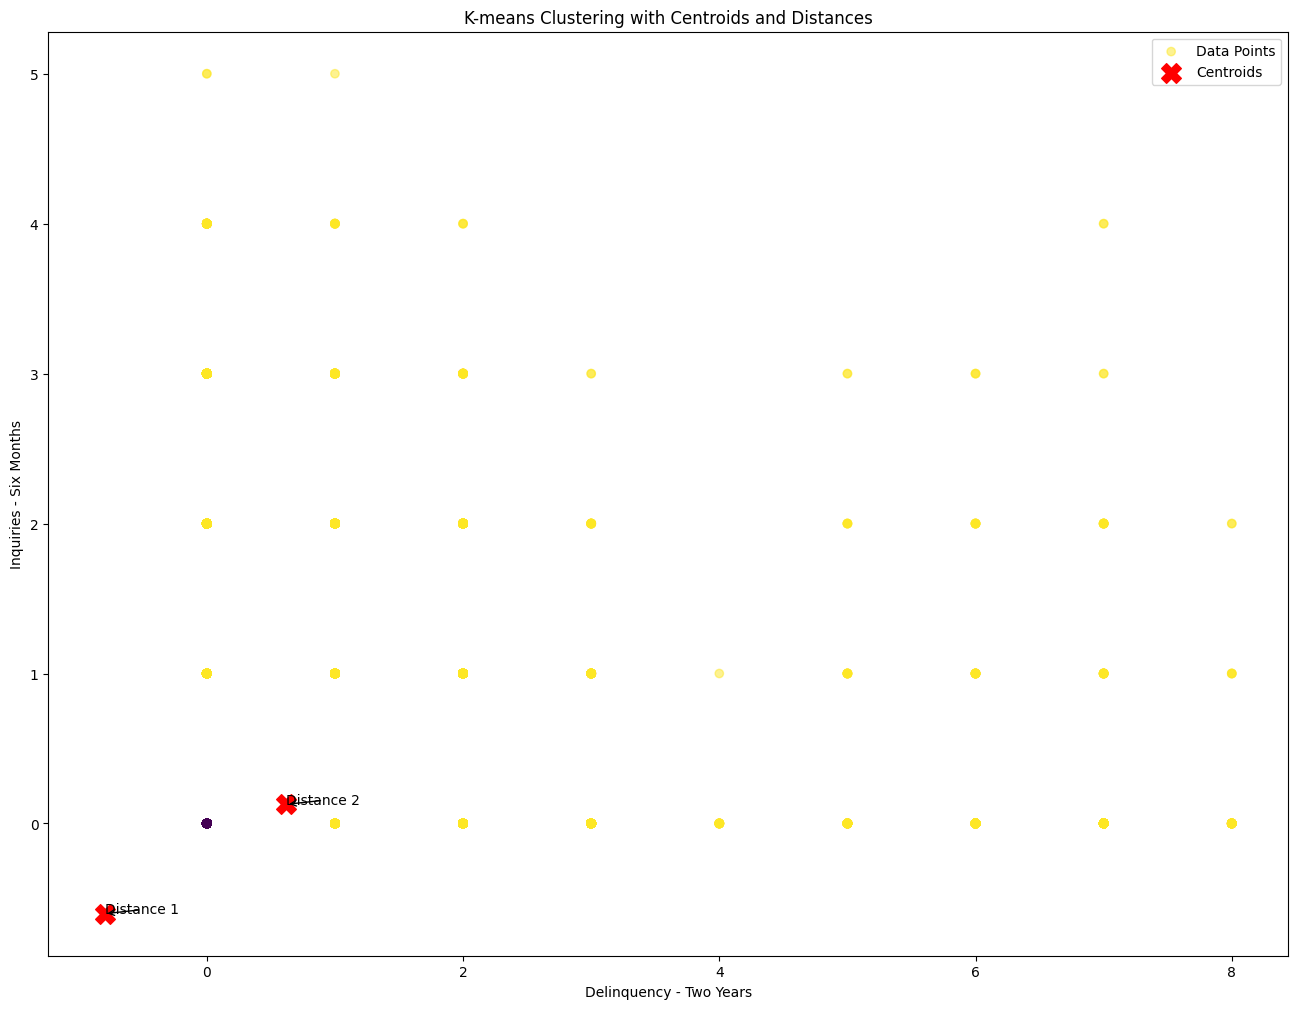

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Extract features for K-means clustering
features_for_clustering = df[['Delinquency - two years', 'Inquires - six months', 'Accounts Delinquent']]

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(features_for_clustering)

# Normalize features
X_normalized = normalize(X_standardized)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_normalized)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_normalized, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Plot features with centroids and distances
plt.figure(figsize=(16, 12))

# Plot data points
plt.scatter(features_for_clustering.iloc[:, 0], features_for_clustering.iloc[:, 1], c=y_kmeans, cmap='viridis', alpha=0.5, label='Data Points')

# Plot centroids with 'X'
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red', label='Centroids')

# Plot lines connecting centroids with distances
for i in range(len(kmeans.cluster_centers_)):
    plt.annotate(f"Distance {i+1}", xy=(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1]), xytext=(0, 0),
                 textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))

# Add legend and labels
plt.legend()
plt.title('K-means Clustering with Centroids and Distances')
plt.xlabel('Delinquency - Two Years')
plt.ylabel('Inquiries - Six Months')

plt.show()


67463


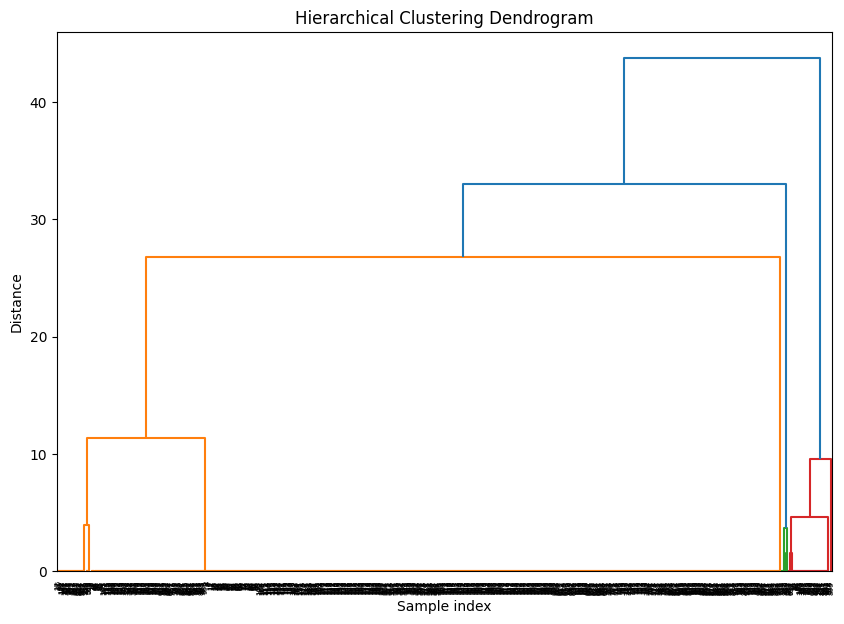

In [16]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'bank_df' contains the data and has been preprocessed

# Step 1: Check the number of rows in the DataFrame
num_rows = len(df)
print(num_rows)
# Step 2: Select the number of rows to sample (minimum of 3000 or number of rows)
sample_size = min(1000, num_rows)

# Step 3: Select a random subset of rows
random_subset = df.sample(n=sample_size, random_state=42)


# Selecting relevant features, adjust these names based on your dataset
col_names = ['Public Record', 'Delinquency - two years', 'Accounts Delinquent']  # Replace with your actual column names
features = random_subset[col_names]

# Apply Standard Scaler
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns=col_names)

# Create Agglomerative Hierarchical Clusters
# Here, we're not specifying the number of clusters directly; instead, we use distance_threshold to determine them
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

# Fit model to the scaled features
cluster_labels = model.fit_predict(scaled_features)

# Add cluster labels to your subset DataFrame
random_subset['Cluster_Labels'] = cluster_labels

# Optional: Plot a dendrogram (this might be heavy for a large number of samples like 6000)
# To plot a dendrogram, a linkage matrix is needed. We will use the ward linkage method for this example.
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


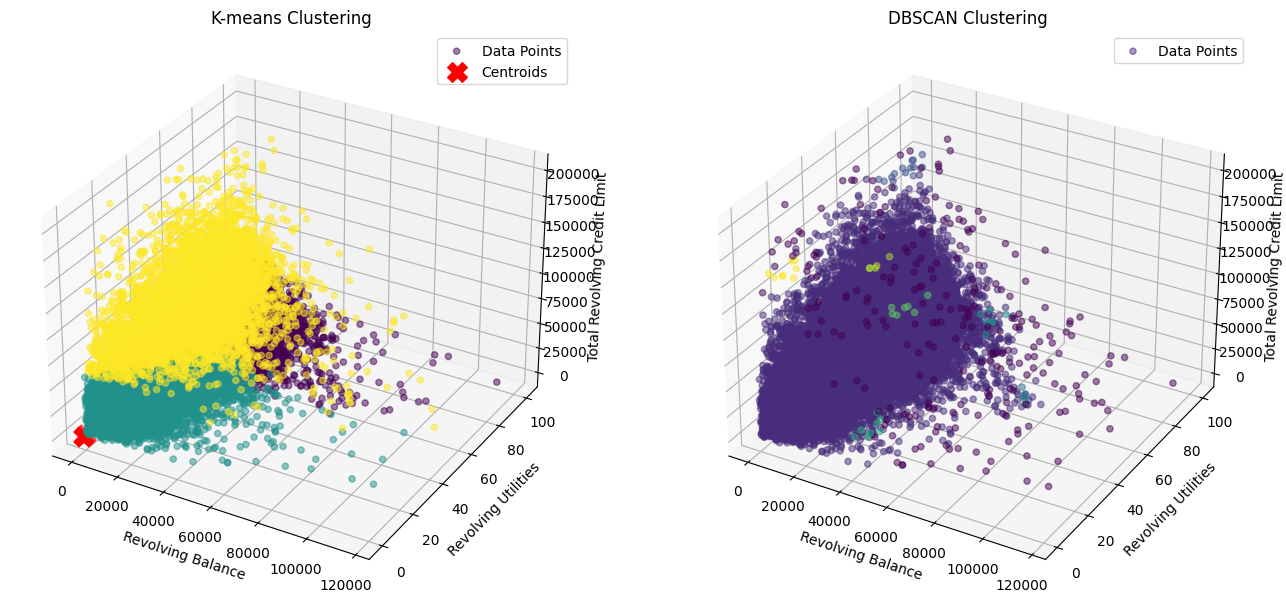

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'df' is your DataFrame
# Extract features for K-means clustering and DBSCAN
features_for_clustering = df[['Revolving Balance', 'Revolving Utilities', 'Total Revolving Credit Limit']]

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(features_for_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_standardized)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_standardized)

# Visualize K-means clustering
fig = plt.figure(figsize=(16, 8))

# 3D scatter plot for K-means
ax = fig.add_subplot(121, projection='3d')
ax.scatter(features_for_clustering.iloc[:, 0], features_for_clustering.iloc[:, 1], features_for_clustering.iloc[:, 2],
           c=y_kmeans, cmap='viridis', alpha=0.5, label='Data Points')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='X', s=200, color='red', label='Centroids')
ax.set_title('K-means Clustering')
ax.set_xlabel('Revolving Balance')
ax.set_ylabel('Revolving Utilities')
ax.set_zlabel('Total Revolving Credit Limit')
ax.legend()

# Visualize DBSCAN clustering
ax = fig.add_subplot(122, projection='3d')
ax.scatter(features_for_clustering.iloc[:, 0], features_for_clustering.iloc[:, 1], features_for_clustering.iloc[:, 2],
           c=y_dbscan, cmap='viridis', alpha=0.5, label='Data Points')
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Revolving Balance')
ax.set_ylabel('Revolving Utilities')
ax.set_zlabel('Total Revolving Credit Limit')
ax.legend()

plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'df' is your DataFrame
# Extract features for K-means clustering and DBSCAN
features_for_clustering = df[['Revolving Balance', 'Revolving Utilities', 'Total Revolving Credit Limit']]

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(features_for_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_standardized)

# Calculate Silhouette and Davies-Bouldin scores for K-means
silhouette_kmeans = silhouette_score(X_standardized, y_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(X_standardized, y_kmeans)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_standardized)

# Calculate Silhouette and Davies-Bouldin scores for DBSCAN
silhouette_dbscan = silhouette_score(X_standardized, y_dbscan)
# Davies-Bouldin score is not directly applicable to DBSCAN, so we set it to None
davies_bouldin_dbscan = None

# Visualize K-means clustering and DBSCAN
fig = plt.figure(figsize=(16, 8))

# ... (rest of the visualization code)

# Print Silhouette and Davies-Bouldin scores
print("K-means:")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Davies-Bouldin Score: {davies_bouldin_kmeans}")

print("\nDBSCAN:")
print(f"Silhouette Score: {silhouette_dbscan}")
print(f"Davies-Bouldin Score: N/A (DBSCAN does not have a Davies-Bouldin score)")

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means:
Silhouette Score: 0.2797563953897075
Davies-Bouldin Score: 1.2263223346957692

DBSCAN:
Silhouette Score: 0.48393977700597635
Davies-Bouldin Score: N/A (DBSCAN does not have a Davies-Bouldin score)


<Figure size 1600x800 with 0 Axes>

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import time
import psutil

# Assuming 'df' is your DataFrame
# Extract features for clustering
features_for_clustering = df[['Revolving Balance', 'Revolving Utilities', 'Total Revolving Credit Limit']]

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(features_for_clustering)

# K-means clustering
start_time_kmeans = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_standardized)
end_time_kmeans = time.time()

# DBSCAN clustering
start_time_dbscan = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_standardized)
end_time_dbscan = time.time()

# Memory usage
memory_usage_kmeans = psutil.virtual_memory().used
memory_usage_dbscan = psutil.virtual_memory().used

# Cluster sizes for K-means
cluster_sizes_kmeans = np.bincount(y_kmeans)

# Cluster sizes for DBSCAN (handling noise points separately)
cluster_sizes_dbscan = np.bincount(y_dbscan + 1)  # Add 1 to handle potential -1 labels for noise points

# Print results
print("K-means:")
print("Time taken:", end_time_kmeans - start_time_kmeans, "seconds")
print("Memory usage:", memory_usage_kmeans, "bytes")
print("Cluster sizes:", cluster_sizes_kmeans)

print("\nDBSCAN:")
print("Time taken:", end_time_dbscan - start_time_dbscan, "seconds")
print("Memory usage:", memory_usage_dbscan, "bytes")
print("Cluster sizes:", cluster_sizes_dbscan)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means:
Time taken: 2.9378724098205566 seconds
Memory usage: 2629197824 bytes
Cluster sizes: [32202 24534 10727]

DBSCAN:
Time taken: 11.352076053619385 seconds
Memory usage: 2629197824 bytes
Cluster sizes: [  237 67170    15     6     7     8     7     5     8]


# **Report** #

**Dataset Description**

The Dataset has the following variables-

ID (Int) ---> unique ID of representative

Loan Amount (Int) ---> loan amount applied

Funded Amount (Int) ---> loan amount funded

Funded Amount Investor (Float) ---> loan amount approved by the investors

Term (Int) ---> term of loan (in months)

Batch Enrolled (Object) ---> batch numbers to representatives

Interest Rate (Float) ---> interest rate (%) on loan

Grade (Object) ---> grade by the bank

Sub Grade (Object) ---> sub-grade by the bank

Employment Duration (Object) ---> duration

Home Ownership (Float) ---> Owner ship of home

Verification Status (Object) ---> Income verification by the bank

Payment Plan (Object) ---> if any payment plan has started against loan

Loan Title (Object) ---> loan title provided

Debit to Income (Float) ---> ratio of representative's total monthly debt repayment (divided by self reported monthly income excluding mortgage)

Delinquency - two years (Int) ---> number of 30+ days delinquency in past 2 years

Inquires - six months (Int) ---> total number of inquiries in last 6 months

Open Account (Int) ---> number of open credit line in representative's credit line

Public Record (Int) ---> number of derogatory public records

Revolving Balance (Int) ---> total credit revolving balance

Revolving Utilities (Float) ---> amount of credit a representative is using relative to revolving_balance

Total Accounts (Int) ---> total number of credit lines available in representatives credit line

Initial List Status (Object) ---> unique listing status of the loan - W(Waiting), F(Forwarded)

Total Received Interest (Float) ---> total interest received till date

Total Received Late Fee (Float) ---> total late fee received till date

Recoveries (Float) ---> post charge off gross recovery

Collection Recovery Fee (Float) ---> post charge off collection fee

Collection 12 months Medical (Int) ---> total collections in last 12 months excluding medical collections

Application Type (Object) ---> indicates when the representative is an individual or joint

Last week Pay (Int) ---> indicates how long (in weeks) a representative has paid EMI after batch enrolled

Accounts Delinquent (Int) ---> number of accounts on which the representative is delinquent

Total Collection Amount (Int) ---> total current balance from all accounts

Total Current Balance (Int) ---> total current balance from all accounts

Total Revolving Credit Limit (Int) ---> total revolving credit limit

Loan Status (Int) ---> 1 = Defaulter, 0 = Non Defaulters

The goal of this report is to segment customers based on these various variables and find out if they can be given a loan by the bank, as a defaults on loans can cost banks a huge amount of money.


Two main clusterings are done on groups-

(Delinquency - two years, Inquires - six months, Accounts Delinquent) and (Revolving Balance, Revolving Utilities, Total Revolving Credit Limit)

Clustering on (Delinquency - two years, Inquires - six months, Accounts Delinquent) examines the delinquency and inquiry patterns to identify groups with different credit behaviors.

Clustering on investigates if there are clusters related to the revolving credit behavior, such as high credit utilization or different credit limit groups.

Parameters used for judging the clustering will be silhouette score and Davies-Bouldin Score.

The silhouette score provides insight into the cohesion and separation of data points within clusters. Specifically, it quantifies the degree to which each item aligns with its own cluster in relation to other clusters. A silhouette score closer to 1 signifies that data points within clusters exhibit strong internal cohesion and are distinctly separated from adjacent clusters. This indicates that the clustering is effective, and the data points are distinctly and accurately assigned to their respective clusters.

 A higher Silhouette Score indicates better-defined clusters with more significant separation between them.

The Davies-Bouldin Score is a metric used to assess the quality of clustering in a dataset. It quantifies the compactness of clusters and the separation between them, offering a concise measure of clustering effectiveness. A lower Davies-Bouldin Score indicates better-defined and more separated clusters, signifying a more robust and accurate clustering solution. This metric aids practitioners in selecting an optimal clustering algorithm or determining the appropriate number of clusters for a given dataset.

Lower values of the Davies-Bouldin Index indicate better clustering, where clusters are well-separated and compact.

**Results**

Silhouette Score for (Delinquency - two years, Inquires - six months, Accounts Delinquent) clustering is 0.8634051782605583 so clusters are well separated and tightly grouped. This suggests a highly favorable scenario. The silhouette score ranges from -1 to 1, with a higher value indicating better-defined and well-separated clusters. In this context, a score of 0.8634 signifies that the data points within the identified clusters are tightly grouped and exhibit substantial cohesion, while also being distinctly separated from other clusters. This suggests a robust and effective clustering solution for the specified variables, indicating clear patterns and distinctions in the credit behavior represented by Delinquency, Inquiries, and Accounts Delinquent.

For (Revolving Balance, Revolving Utilities, Total Revolving Credit Limit) cluster-

K-means:
Silhouette Score: 0.2797563953897075
Davies-Bouldin Score: 1.2263223346957692

DBSCAN:
Silhouette Score: 0.48393977700597635
Davies-Bouldin Score: N/A (DBSCAN does not have a Davies-Bouldin score)

K-means:

Silhouette Score (0.2798): The relatively low silhouette score suggests that the clusters have overlapping data points and are not well-separated. This may indicate challenges in finding distinct patterns within the data.

Davies-Bouldin Score (1.2263): The Davies-Bouldin score is moderate, suggesting a reasonable balance between cluster compactness and separation. However, it's essential to interpret this in conjunction with the silhouette score, as it may indicate some degree of clustering ambiguity.

DBSCAN:

Silhouette Score (0.4839): The higher silhouette score for DBSCAN suggests better-defined and more cohesive clusters compared to K-means. This implies that data points within the same cluster are more similar to each other than to points in other clusters.

Davies-Bouldin Score (N/A): DBSCAN does not have a Davies-Bouldin score because its nature of density-based clustering doesn't adhere to the assumptions required for the Davies-Bouldin calculation. This is a characteristic of DBSCAN rather than an issue, and it emphasizes its suitability for irregularly shaped clusters.

**Comparison on memory and time taken-**

K-means:

Time Taken (2.94 seconds): K-means clustering required a relatively shorter time to complete, indicating efficiency in processing the given data.

Memory Usage (2,629,197,824 bytes): The memory usage for K-means clustering is reasonable, considering the size of the dataset and the computational requirements.

Cluster Sizes: The clusters identified by K-means have sizes of approximately 32,202, 24,534, and 10,727, respectively. This suggests a relatively balanced distribution of data points across the identified clusters.

DBSCAN:

Time Taken (11.35 seconds): DBSCAN took a longer time to complete compared to K-means. DBSCAN, being a density-based algorithm, might be more sensitive to the data's complexity or noise.

Memory Usage (2,629,197,824 bytes): The memory usage for DBSCAN is consistent with that of K-means, indicating comparable efficiency in memory utilization.

Cluster Sizes: DBSCAN identified various cluster sizes, with the largest cluster containing approximately 67,170 data points. Additionally, there are several smaller clusters, and a few data points labeled as noise (label -1). The varying cluster sizes and the presence of noise points suggest DBSCAN's ability to adapt to irregularly shaped clusters and identify outliers.

**CONCLUSION**

The selection between K-Means and DBSCAN hinges on several key considerations, including the dataset's size, available computational resources, and the specific requirements for cluster granularity. K-Means exhibits advantages in scenarios involving larger datasets or situations where a predefined number of clusters is preferred, as demonstrated by its relatively efficient processing time and balanced cluster sizes in the given analysis.

Conversely, DBSCAN, with its density-based approach, offers valuable adaptability to irregularly shaped clusters and noise detection. The longer processing time observed for DBSCAN underscores its sensitivity to the inherent complexity of the data. The presence of varying cluster sizes and noise points in the DBSCAN results highlights its capability to capture intricate structures within the dataset.

In summary, the choice between K-Means and DBSCAN is contingent upon the unique characteristics of the dataset and the analytical goals. K-Means proves advantageous for efficiency and well-defined clusters, particularly in larger datasets. Meanwhile, DBSCAN excels in scenarios where adaptability to irregular structures and noise detection are crucial for a more nuanced understanding of the underlying data patterns.